<a href="https://colab.research.google.com/github/hafluz/tsunami_exploratory/blob/main/Project_2_Tsunami_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory data analysis of Tsunami events dataset

## **Data Setup**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('max_column', 200)

!pip install --upgrade geopandas
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

In [2]:
from google.colab import auth
from google.cloud import bigquery

project_id = "sixth-zoo-371021"
client = bigquery.Client(project=project_id)
auth.authenticate_user()
print('Authenticated')

Authenticated


In [ ]:
# df = pd.read_csv()

In [5]:
df = client.query('''
SELECT *
FROM `bigquery-public-data.noaa_tsunami.historical_source_event`
''' ).to_dataframe()

df.head()

,id,year,month,day,timestamp,event_validity,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,deaths,deaths_description,missing,missing_description,injuries,injuries_description,damage_millions_dollars,damage_description,houses_destroyed,houses_destroyed_description,houses_damaged,houses_damaged_description,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,3190,1774,9,24,1774-09-24 00:00:00,1,0,<NA>,NaN,None,None,MEDITERRANEAN SEA,NaN,NaN,50,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
1,3650,<NA>,<NA>,<NA>,None,<NA>,<NA>,<NA>,NaN,None,None,None,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,97,1099,11,11,1099-11-11 00:00:00,1,0,<NA>,NaN,UK,None,"WEST CORNWALL, ENGLAND",50.116,-5.483,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,187,1580,4,6,1580-04-06 00:00:00,0,1,33,6.2,UK,None,"DOVER STRAITS, ENGLAND",51.019,1.309,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,224,1609,1,19,1609-01-19 00:00:00,1,0,<NA>,NaN,UK,None,ENGLAND,51.500,0.466,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>



## **Data Understanding**

In [6]:
df.shape

(2800, 44)

In [7]:
df.head()

,id,year,month,day,timestamp,event_validity,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,deaths,deaths_description,missing,missing_description,injuries,injuries_description,damage_millions_dollars,damage_description,houses_destroyed,houses_destroyed_description,houses_damaged,houses_damaged_description,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,3190,1774,9,24,1774-09-24 00:00:00,1,0,<NA>,NaN,None,None,MEDITERRANEAN SEA,NaN,NaN,50,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
1,3650,<NA>,<NA>,<NA>,None,<NA>,<NA>,<NA>,NaN,None,None,None,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
2,97,1099,11,11,1099-11-11 00:00:00,1,0,<NA>,NaN,UK,None,"WEST CORNWALL, ENGLAND",50.116,-5.483,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
3,187,1580,4,6,1580-04-06 00:00:00,0,1,33,6.2,UK,None,"DOVER STRAITS, ENGLAND",51.019,1.309,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>
4,224,1609,1,19,1609-01-19 00:00:00,1,0,<NA>,NaN,UK,None,ENGLAND,51.500,0.466,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>


In [8]:
df.columns

Index(['id', 'year', 'month', 'day', 'timestamp', 'event_validity',
       'cause_code', 'focal_depth', 'primary_magnitude', 'country', 'state',
       'location_name', 'latitude', 'longitude', 'region_code',
       'maximum_water_height', 'abe', 'iida', 'soloviev', 'warning_status',
       'deaths', 'deaths_description', 'missing', 'missing_description',
       'injuries', 'injuries_description', 'damage_millions_dollars',
       'damage_description', 'houses_destroyed',
       'houses_destroyed_description', 'houses_damaged',
       'houses_damaged_description', 'total_deaths',
       'total_deaths_description', 'total_missing',
       'total_missing_description', 'total_injuries',
       'total_injuries_description', 'total_damage_in_millions_dollars',
       'total_damage_description', 'total_houses_destroyed',
       'total_houses_destroyed_description', 'total_houses_damaged',
       'total_houses_damaged_description'],
      dtype='object')

In [11]:
df.dtypes

id                                      Int64
year                                    Int64
month                                   Int64
day                                     Int64
timestamp                              object
event_validity                          Int64
cause_code                              Int64
focal_depth                             Int64
primary_magnitude                     float64
country                                object
state                                  object
location_name                          object
latitude                              float64
longitude                             float64
region_code                             Int64
maximum_water_height                  float64
abe                                   float64
iida                                  float64
soloviev                              float64
warning_status                          Int64
deaths                                  Int64
deaths_description                

In [139]:
df.describe()

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
count,2419.000000,2419.000000,2419.000000,959.000000,1573.000000,2419.000000,2419.000000,2418.000000,1142.000000,1.0,708.000000,1155.000000,57.000000,577.000000,711.000000,10.000000,11.000000,277.000000,322.000000,141.000000,1115.000000,2.280000e+02,635.000000,73.000000,220.000000
mean,2401.422489,1819.464241,1.710624,35.813347,7.018182,17.401866,39.241949,75.286187,6.324151,8.1,0.697006,1.403082,2.666667,4442.126516,2.171589,4549.000000,2.000000,4949.584838,2.267081,4256.171674,2.172197,3.521585e+04,2.633071,29246.082192,2.250000
std,1712.729858,350.895092,2.011900,40.459619,0.807093,27.780921,104.143149,14.479780,27.032369,NaN,2.116502,1.847514,1.340753,22388.773747,1.210905,13680.654313,1.183216,30286.627718,1.139808,21845.873026,1.062220,3.581610e+05,1.038308,76861.182359,1.133246
min,1.000000,-2000.000000,0.000000,0.000000,3.200000,-63.000000,-179.971000,30.000000,0.010000,8.1,-4.640000,-4.140000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.005000,1.000000,1.000000e+00,1.000000,2.000000,1.000000
25%,1098.000000,1830.000000,1.000000,16.000000,6.500000,-4.691000,-70.100000,60.000000,0.250000,8.1,-0.775000,0.500000,2.000000,5.000000,1.000000,15.000000,1.000000,18.000000,1.000000,3.000000,1.000000,4.000000e+01,2.000000,127.000000,1.000000
50%,1973.000000,1907.000000,1.000000,30.000000,7.000000,24.470000,29.200000,82.000000,1.000000,8.1,1.000000,1.500000,3.000000,45.000000,2.000000,84.000000,1.000000,100.000000,2.000000,41.000000,2.000000,6.500000e+02,3.000000,900.000000,2.000000
75%,3458.500000,1968.000000,1.000000,39.500000,7.500000,38.767000,136.850000,85.000000,4.000000,8.1,2.000000,3.000000,4.000000,804.000000,3.000000,582.500000,3.000000,500.000000,3.000000,530.000000,3.000000,3.059250e+03,3.000000,10044.000000,3.000000
max,5808.000000,2021.000000,10.000000,600.000000,9.500000,71.813000,179.984000,89.000000,524.600000,8.1,8.400000,9.000000,4.000000,316000.000000,4.000000,43476.000000,4.000000,374171.000000,4.000000,220085.456000,4.000000,5.360000e+06,4.000000,500000.000000,4.000000


## **Data Preparation**

In [12]:
df = df[['id', 'year', 
        #  'month', 'day', 'timestamp', 'event_validity',
       'cause_code', 'focal_depth', 'primary_magnitude', 'country', 'state',
       'location_name', 'latitude', 'longitude', 'region_code',
       'maximum_water_height', 'abe', 'iida', 'soloviev', 'warning_status',
      #  'deaths', 'deaths_description', 'missing', 'missing_description',
      #  'injuries', 'injuries_description', 'damage_millions_dollars',
      #  'damage_description', 'houses_destroyed',
      #  'houses_destroyed_description', 'houses_damaged',
      #  'houses_damaged_description',
        'total_deaths',
       'total_deaths_description', 'total_missing',
       'total_missing_description', 'total_injuries',
       'total_injuries_description', 'total_damage_in_millions_dollars',
       'total_damage_description', 'total_houses_destroyed',
       'total_houses_destroyed_description', 'total_houses_damaged',
       'total_houses_damaged_description']].copy()

In [ ]:
# df.drop(['month', 'day', 'timestamp', 'event_validity'], axis=1)

In [13]:
df.shape

(2800, 28)

In [14]:
df.dtypes

id                                      Int64
year                                    Int64
cause_code                              Int64
focal_depth                             Int64
primary_magnitude                     float64
country                                object
state                                  object
location_name                          object
latitude                              float64
longitude                             float64
region_code                             Int64
maximum_water_height                  float64
abe                                   float64
iida                                  float64
soloviev                              float64
warning_status                          Int64
total_deaths                            Int64
total_deaths_description                Int64
total_missing                           Int64
total_missing_description               Int64
total_injuries                          Int64
total_injuries_description        

In [ ]:
pd.to_numeric(df['year'])

0        1867
1        1917
2        1917
3        1868
4        1918
         ... 
28290    1964
28291    1964
28292    1964
28293    1964
28294    1964
Name: year, Length: 28295, dtype: Int64

In [16]:
df = df.rename(columns={'id':'tsunami_id'})

In [39]:
df.isna().sum()

tsunami_id                               0
year                                     0
cause_code                               0
focal_depth                           1460
primary_magnitude                      846
country                                  0
state                                 2202
location_name                            2
latitude                                 0
longitude                                0
region_code                              1
maximum_water_height                  1277
abe                                   2418
iida                                  1711
soloviev                              1264
warning_status                        2362
total_deaths                          1842
total_deaths_description              1708
total_missing                         2409
total_missing_description             2408
total_injuries                        2142
total_injuries_description            2097
total_damage_in_millions_dollars      2278
total_damag

In [38]:
# Drop rows with missing Cause Codes

df = df[~df['cause_code'].isnull()]

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

# df['travel_time_minutes'] = df['travel_time_minutes'].fillna(0)
df['travel_time_hours'].astype(float)
df = df.replace({pd.NA: np.nan})

In [19]:
# Drop rows with missing locations

df = df.dropna(subset=['latitude', 'longitude'])

In [45]:
df.head(10)

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description,tsunami_cause
2,97,1099,0,<NA>,NaN,UK,None,"WEST CORNWALL, ENGLAND",50.116,-5.483,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
3,187,1580,1,33,6.2,UK,None,"DOVER STRAITS, ENGLAND",51.019,1.309,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Earthquake
4,224,1609,0,<NA>,NaN,UK,None,ENGLAND,51.500,0.466,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
5,457,1755,0,<NA>,NaN,UK,None,"RIVER TEES, ENGLAND",54.680,-1.210,73,0.9,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
6,460,1756,0,<NA>,NaN,UK,None,"ILFRACOMBE, ENGLAND",51.208,-4.122,73,1.8,NaN,0.8,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
7,463,1757,1,<NA>,NaN,UK,None,"SCILLY ISLANDS, ENGLAND",49.920,-6.320,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Earthquake
8,469,1761,9,<NA>,NaN,UK,None,"MOUNT'S BAY, ENGLAND",50.033,-5.417,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Meteorological
9,470,1761,1,<NA>,NaN,UK,None,"GUERNSEY, ENGLISH CHANNEL",49.465,-2.585,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Earthquake
10,473,1762,0,<NA>,NaN,UK,None,"THE THAMES, ENGLAND",51.500,0.100,73,3.0,NaN,1.6,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
11,480,1763,0,<NA>,NaN,UK,None,"WEYMOUTH, ENGLAND",50.600,-2.466,73,3.0,NaN,1.6,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown


In [28]:
# Checking for duplicates

df.loc[df.duplicated()]

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
1733,1926,1961,1,15,6.5,CHILE,None,CENTRAL CHILE,-36.7,-73.0,89,NaN,NaN,NaN,NaN,<NA>,<NA>,1,<NA>,<NA>,<NA>,<NA>,NaN,1,<NA>,<NA>,<NA>,<NA>


In [30]:
# Drop duplicates

df.drop_duplicates(subset='tsunami_id', keep='first', inplace=True)

In [31]:
df.loc[df.duplicated(subset=['tsunami_id'])]

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description


In [ ]:
# Removing Outliers

def remove_outlier_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  Inter_Q = Q3-Q1
  list_final = [~((df<(Q1 - 1.5*Inter_Q)) | (df>(Q3 + 1.5*Inter_Q)))]
  df_final = pd.DataFrame(list_final)
  return df_final

In [44]:
# Creating new column with Tsunami Cause Names

df['tsunami_cause'] = np.where(df['cause_code'] == 1, 'Earthquake',
                      np.where(df['cause_code'] == 2, 'Questionable Earthquake',
                      np.where(df['cause_code'] == 3, 'Earthquake and Landslide', 
                      np.where(df['cause_code'] == 4, ' Volcano and Earthquake',
                      np.where(df['cause_code'] == 5, 'Volcano, Earthquake, and Landslide',
                      np.where(df['cause_code'] == 6, 'Volcano', 
                      np.where(df['cause_code'] == 7, 'Volcano and Landslide',
                      np.where(df['cause_code'] == 8, 'Landslide',
                      np.where(df['cause_code'] == 9, 'Meteorological',   
                      np.where(df['cause_code'] == 10, 'Explosion',     
                      np.where(df['cause_code'] == 11, 'Astronomical Tide',                                 
                                  'Unknown')))))))))))

##**Data Understanding**

In [32]:
df['year'].value_counts()

1928    23
1938    22
1994    21
2017    19
2007    19
        ..
358      1
362      1
1546     1
1611     1
1645     1
Name: year, Length: 526, dtype: Int64

Text(0, 0.5, 'Year')

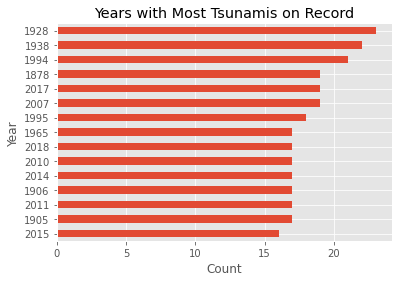

In [167]:
# Plotting the Years with Most Tsunamis on Record

ax = df['year'].value_counts() \
    .head(15) \
    .plot(kind='barh', title ='Years with Most Tsunamis on Record')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Year')

Text(0, 0.5, 'Country')

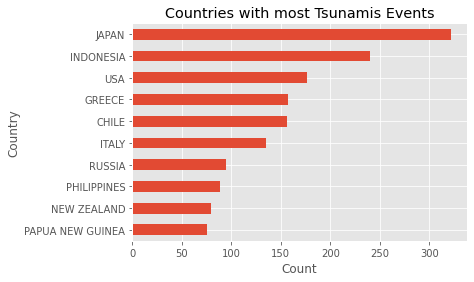

In [35]:
# Plotting the Countries with Most Tsunamis Events

ax = df['country'].value_counts().head(10) \
    .plot(kind='barh', title ='Countries with most Tsunamis Events')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Country')

Text(0, 0.5, 'Tsunami Cause')

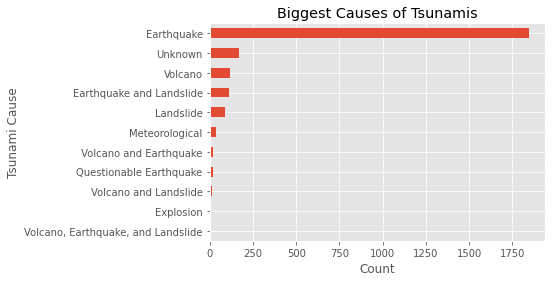

In [151]:
# Plotting the Biggest Causes of Tsunamis

ax = df['tsunami_cause'].value_counts().sort_values(ascending=False) \
    .plot(kind = 'barh', title= 'Biggest Causes of Tsunamis')
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_ylabel('Tsunami Cause')

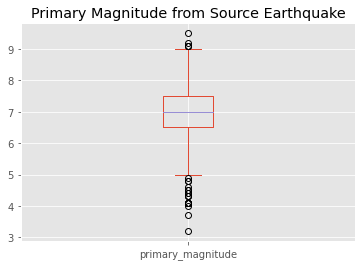

In [66]:
# Boxplot of Primary Magnitude from Source Earthquake

df['primary_magnitude'].plot(kind='box', title='Primary Magnitude from Source Earthquake')

Text(0.5, 0, 'Magnitude')

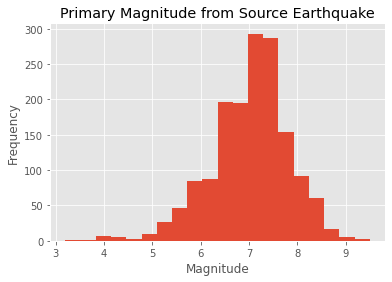

In [58]:
# Histogram of Primary Magnitude from Source Earthquake

ax = df['primary_magnitude'].plot(kind='hist', bins=20, title='Primary Magnitude from Source Earthquake')
ax.set_xlabel('Magnitude')

Text(0.5, 0, 'Depth (Km)')

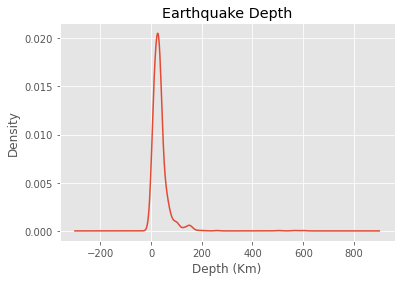

In [65]:
# Plotting Earthquake Depth

ax = df['focal_depth'].plot(kind='kde', title='Earthquake Depth')
ax.set_xlabel('Depth (Km)')

##**Plotting geo positioning**

In [67]:
# Geo Plotting using Folium

map1 = folium.Map(location=[0, 0], tiles='openstreetmap', zoom_start=4.8)

for idx, row in df.iterrows():
    Marker([row['latitude'], row['longitude']], icon=folium.Icon(color='blue', icon='tint', prefix='fa')).add_to(map1)

map1

In [68]:
map2 = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.6)

mc = MarkerCluster()
for idx, row in df.iterrows():
    mc.add_child(Marker([row['latitude'], row['longitude']]))

map2.add_child(mc)
map2

In [161]:
# Heatmap

map3 = folium.Map(location=[0.0, 0.0], tiles='cartodbpositron', zoom_start=1.5)

HeatMap(data=df[['latitude', 'longitude']], radius=10).add_to(map3)

map3

In [ ]:
# del map

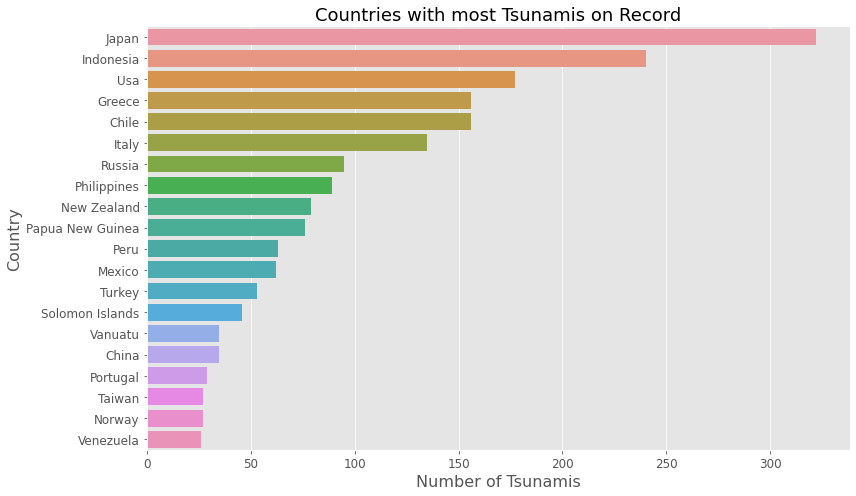

In [162]:
# Plotting the Countries with most Tsunamis on Record 

plt.figure(figsize=(12,7))
countries = list(map(lambda x: x.title(), df["country"].value_counts().keys().tolist()))
ax = sns.countplot(y="country", data=df, order=df["country"].value_counts().head(20).index)
ax.set_xscale("linear")
ax.axes.set_title("Countries with most Tsunamis on Record",fontsize=18)
ax.set_xlabel("Number of Tsunamis",fontsize=16)
ax.set_ylabel("Country",fontsize=16)
ax.tick_params(labelsize=12)
ax.set_yticklabels(countries, rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

##**Data Relationships**

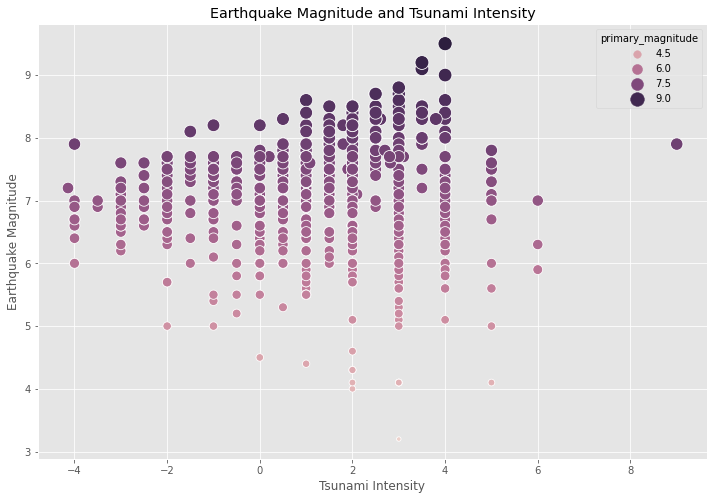

In [104]:
# Relatioship between Earthquake Magnitude and Tsunami Intensity

fig = plt.gcf()
fig.set_size_inches(12,8)

sns.scatterplot(x='soloviev',
                y='primary_magnitude',
                hue="primary_magnitude", size="primary_magnitude",
                sizes=(20, 200),
                data=df)

plt.title('Earthquake Magnitude and Tsunami Intensity')
plt.xlabel('Tsunami Intensity')
plt.ylabel('Earthquake Magnitude')
plt.show()

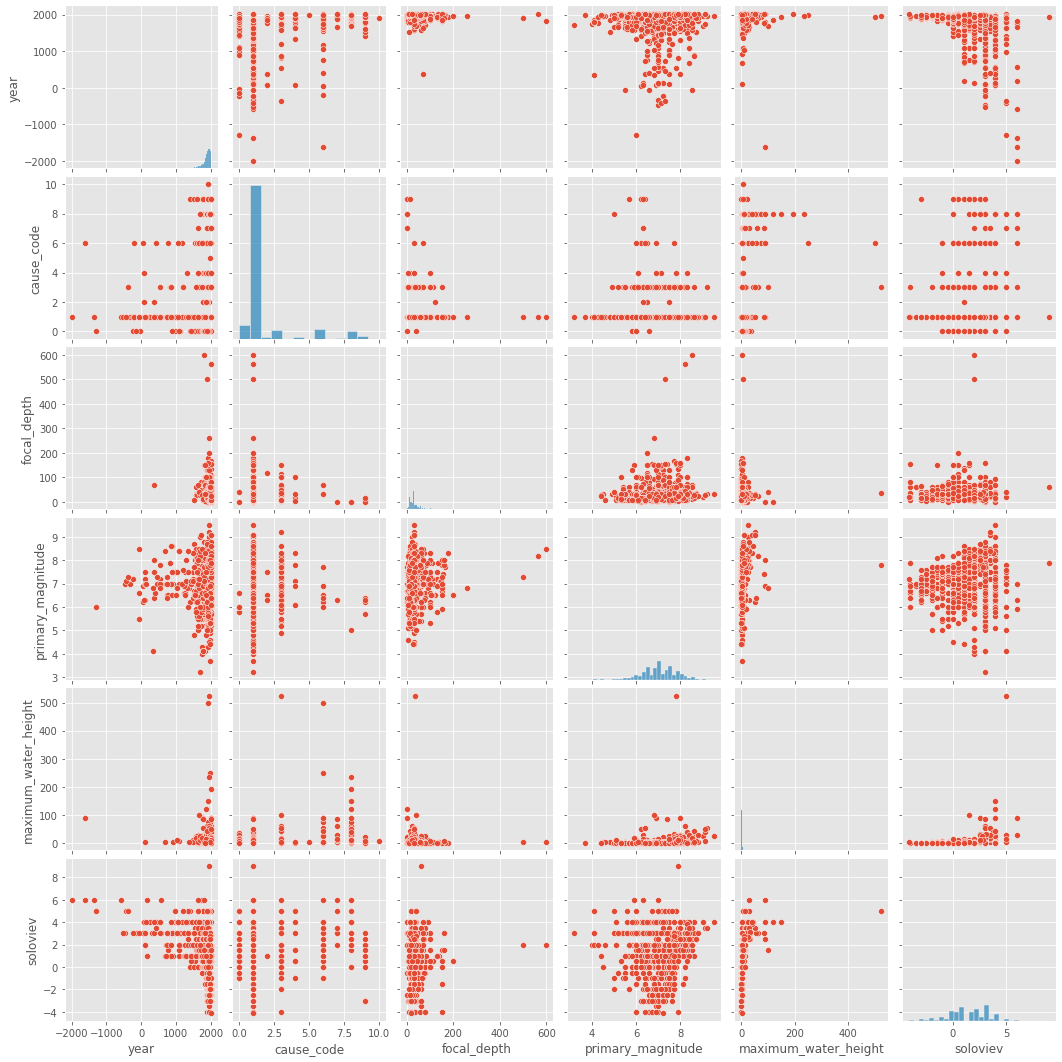

In [105]:
# Relatioship between Variables

sns.pairplot(df, 
             vars=['year','cause_code', 'focal_depth', \
                    'primary_magnitude','maximum_water_height','soloviev'])
              #hue='')
plt.show()

In [108]:
# Measuring Correlation between Variables

df_corr = df[['year','cause_code', 'focal_depth', \
              'primary_magnitude','maximum_water_height','soloviev']].corr()
df_corr

,year,cause_code,focal_depth,primary_magnitude,maximum_water_height,soloviev
year,1.000000,0.048306,-0.138825,0.008454,-0.083492,-0.359355
cause_code,0.048306,1.000000,-0.060096,-0.078168,0.229996,0.112291
focal_depth,-0.138825,-0.060096,1.000000,0.113958,-0.007962,0.028522
primary_magnitude,0.008454,-0.078168,0.113958,1.000000,0.137714,0.090036
maximum_water_height,-0.083492,0.229996,-0.007962,0.137714,1.000000,0.284137
soloviev,-0.359355,0.112291,0.028522,0.090036,0.284137,1.000000


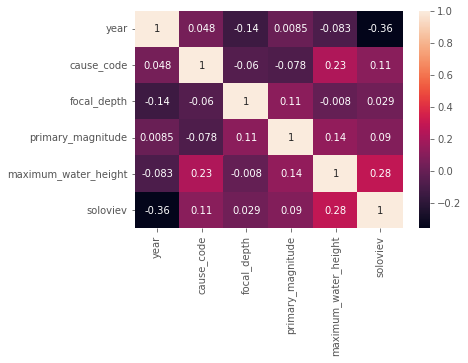

In [109]:
# Variables Heatmap

sns.heatmap(df_corr, annot=True)

##**Data Querying and Insights**


In [110]:
df.head()

,tsunami_id,year,cause_code,focal_depth,primary_magnitude,country,state,location_name,latitude,longitude,region_code,maximum_water_height,abe,iida,soloviev,warning_status,total_deaths,total_deaths_description,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_in_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description,tsunami_cause
2,97,1099,0,<NA>,NaN,UK,None,"WEST CORNWALL, ENGLAND",50.116,-5.483,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
3,187,1580,1,33,6.2,UK,None,"DOVER STRAITS, ENGLAND",51.019,1.309,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Earthquake
4,224,1609,0,<NA>,NaN,UK,None,ENGLAND,51.500,0.466,73,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
5,457,1755,0,<NA>,NaN,UK,None,"RIVER TEES, ENGLAND",54.680,-1.210,73,0.9,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown
6,460,1756,0,<NA>,NaN,UK,None,"ILFRACOMBE, ENGLAND",51.208,-4.122,73,1.8,NaN,0.8,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,Unknown


###Countries with highest tsunami water height on average

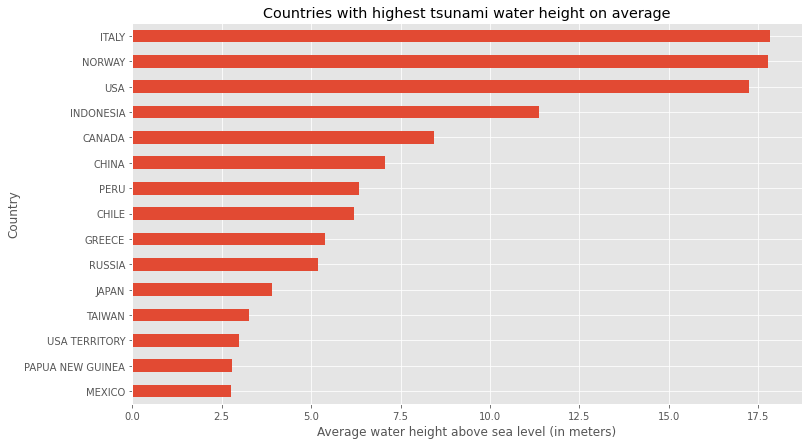

In [153]:
ax = df.query('location_name != "NA"') \
    .groupby('country')['maximum_water_height'] \
    .agg(['mean','count']) \
    .query('count > 10') \
    .sort_values('mean', ascending=False)['mean'].head(15) \
    .plot(kind='barh', figsize=(12,7), title='Countries with highest tsunami water height on average')
ax.invert_yaxis()
ax.set_xlabel('Average water height above sea level (in meters)')  
ax.set_ylabel('Country')
plt.show()

###Countries with deadliest tsunamis on average


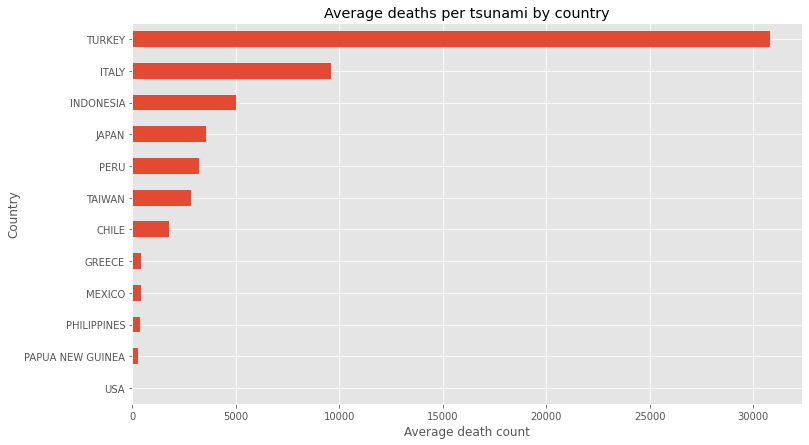

In [155]:
ax = df.query('location_name != "NA"') \
    .groupby('country')['total_deaths'] \
    .agg(['mean','count']) \
    .query('count > 10') \
    .sort_values('mean',ascending=False)['mean'].head(20) \
    .plot(kind='barh', figsize=(12,7), title='Average deaths per tsunami by country')
ax.invert_yaxis()
ax.set_xlabel('Average death count')  
ax.set_ylabel('Country')
plt.show()

###Years with Biggest Damages caused by Tsunamis (in Millions of Dollars)

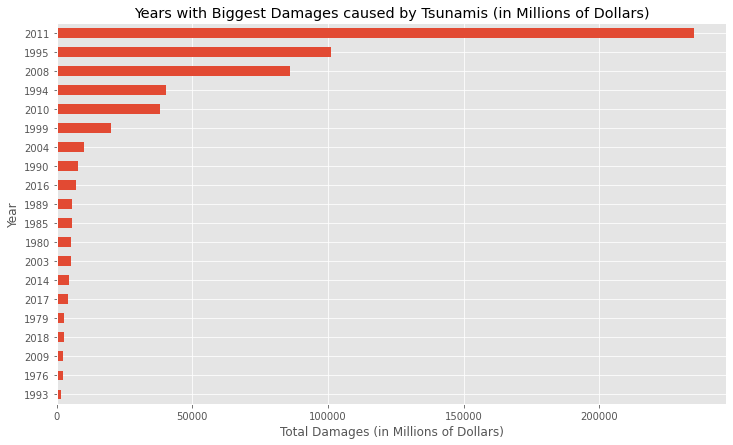

In [156]:
ax = df.query('location_name != "NA"') \
    .groupby('year')['total_damage_in_millions_dollars'] \
    .agg(['sum','count']) \
    .sort_values('sum',ascending=False)['sum'].head(20) \
    .plot(kind='barh', figsize=(12,7), title='Years with Biggest Damages caused by Tsunamis (in Millions of Dollars)')
ax.invert_yaxis()
ax.set_xlabel('Total Damages (in Millions of Dollars)')  
ax.set_ylabel('Year')
plt.show()

###Maximum Tsunami Intensity per Country

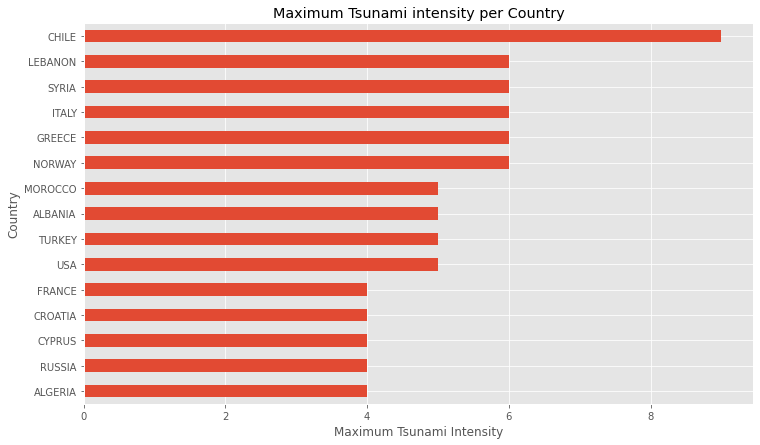

In [160]:
ax = df.query('location_name != "NA"') \
    .groupby('country')['soloviev'] \
    .agg(['max']) \
    .sort_values('max',ascending=False)['max'].head(15) \
    .plot(kind='barh', figsize=(12,7), title='Maximum Tsunami Intensity per Country')
ax.invert_yaxis()
ax.set_xlabel('Maximum Tsunami Intensity')  
ax.set_ylabel('Country')
plt.show()

In [ ]:
df.to_csv('tsunami.csv', index=False)